In [13]:
import av
import os

corpus = "msvd"
for folder_name in ["videos", "videos_240_h264_keyint_40"]:
    print(f"------------------- Processing folder: {folder_name} ------------------")
    video_files = os.listdir(f'./dataset/{corpus}/{folder_name}')
    for file_name in sorted(video_files)[10:20]:

        # Mở file video
        container = av.open(os.path.join(
            f'./dataset/{corpus}/{folder_name}', file_name))
        frame_count = 0
        pts = []

        # Lặp qua các frame trong stream video
        # Chúng ta decode stream video chính (thường là stream 0)
        for i, frame in enumerate(container.decode(video=0)):
            # Kiểm tra cờ frame.key_frame
            # I-frame sẽ có cờ này là True
            if folder_name == "videos" and frame.key_frame:
                frame_count += 1
                # print(f"Phát hiện I-frame tại PTS: {frame.pts}")
                pts.append(frame.pts)
            elif folder_name != "videos" and i % 40 == 0:
            # if i % 40 == 0:  # Giả sử keyint = 40
                frame_count += 1
                # print(f"Phát hiện I-frame tại PTS: {frame.pts}")
                pts.append(frame.pts)
                # # Lưu frame thành file ảnh (ví dụ: PNG)
                # img = frame.to_image() # Chuyển đổi thành PIL Image
                # print(img)

        print(f"[{file_name}] Đã trích xuất {frame_count} I-frame tại PTS: {pts}")
        container.close()

------------------- Processing folder: videos ------------------
[-FugkxLmGO4_5_16.avi] Đã trích xuất 12 I-frame tại PTS: [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276]
[-Ms9tsWmhyU_80_95.avi] Đã trích xuất 8 I-frame tại PTS: [1, 30, 59, 88, 117, 146, 175, 204]
[-YI0cxuNcq8_262_272.avi] Đã trích xuất 6 I-frame tại PTS: [1, 60, 119, 178, 237, 296]
[-_aaMGK6GGw_57_61.avi] Đã trích xuất 9 I-frame tại PTS: [1, 18, 28, 33, 48, 61, 81, 98, 113]
[-_hbPLsZvvo_172_179.avi] Đã trích xuất 8 I-frame tại PTS: [1, 60, 119, 178, 237, 296, 342, 395]
[-_hbPLsZvvo_18_25.avi] Đã trích xuất 8 I-frame tại PTS: [1, 60, 119, 178, 222, 281, 340, 399]
[-_hbPLsZvvo_19_25.avi] Đã trích xuất 7 I-frame tại PTS: [1, 60, 119, 163, 222, 281, 340]
[-_hbPLsZvvo_19_26.avi] Đã trích xuất 9 I-frame tại PTS: [1, 60, 119, 163, 222, 281, 340, 382, 409]
[-_hbPLsZvvo_211_219.avi] Đã trích xuất 9 I-frame tại PTS: [1, 60, 119, 178, 237, 296, 331, 390, 449]
[-_hbPLsZvvo_269_275.avi] Đã trích xuất 8 I-frame tại PTS: [1, 3

In [ ]:
import av
import os

corpus = "msrvtt"
for folder_name in ["videos", "videos_h264_keyint_60"]:
    print(f"------------------- Processing folder: {folder_name} ------------------")
    video_files = os.listdir(f'./dataset/{corpus}/{folder_name}')
    for file_name in video_files:        

        # Mở file video
        container = av.open(os.path.join(f'./dataset/{corpus}/{folder_name}', file_name))
        frame_count = 0
        pts = []
        # Lặp qua các frame trong stream video
        # Chúng ta decode stream video chính (thường là stream 0)
        for frame in container.decode(video=0):
            
            # Kiểm tra cờ frame.key_frame
            # I-frame sẽ có cờ này là True
            if frame.key_frame:
                frame_count += 1
                # print(f"Phát hiện I-frame tại PTS: {frame.pts}")
                pts.append(frame.pts)
                
                # # Lưu frame thành file ảnh (ví dụ: PNG)
                # img = frame.to_image() # Chuyển đổi thành PIL Image
                # print(img)

        print(f"[{file_name}] Đã trích xuất {frame_count} I-frame tại PTS: {pts}")
        container.close()

------------------- Processing folder: videos ------------------
[fvideo0.mp4] Đã trích xuất 4 I-frame tại PTS: [0, 26624, 89600, 146432]
[fvideo1.mp4] Đã trích xuất 5 I-frame tại PTS: [0, 67584, 129024, 204800, 248320]
[fvideo2.mp4] Đã trích xuất 2 I-frame tại PTS: [990, 123112]
[fvideo3.mp4] Đã trích xuất 3 I-frame tại PTS: [0, 17920, 55296]
------------------- Processing folder: videos_h264_keyint_60 ------------------
[fvideo0.mp4] Đã trích xuất 6 I-frame tại PTS: [0, 26624, 57344, 88064, 118784, 146432]
[fvideo1.mp4] Đã trích xuất 12 I-frame tại PTS: [0, 3584, 34304, 65024, 95744, 126464, 157184, 187904, 204800, 235520, 248320, 279040]
[fvideo2.mp4] Đã trích xuất 6 I-frame tại PTS: [0, 60060, 110110, 122122, 182182, 242242]
[fvideo3.mp4] Đã trích xuất 6 I-frame tại PTS: [0, 17920, 48640, 55296, 84992, 115712]


In [ ]:
corpus = "vatex"
keyint = 40
resize = 240

command = f"""
!python video_convert.py --codec=libx264 --keyint={keyint} --resize={resize} -i dataset/{corpus}/videos -o dataset/{corpus}/videos_{resize}_h264_keyint_{keyint}
"""
command.strip()

'!python video_convert.py --codec=libx264 --keyint=40 --resize=240 -i dataset/vatex/videos -o dataset/vatex/videos_240_h264_keyint_40'

In [ ]:
from typing import List, Optional
import cv2
from PIL import Image
import numpy as np


def extract_frames_as_pil(video_path: str) -> List[Image.Image]:
    """
    Extract all frames from a video and return them as a list of PIL.Image objects.

    Parameters
    - video_path: path to input video file.

    Returns
    - List of PIL.Image.Image objects (RGB)
    """

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise IOError(f"Cannot open video file: {video_path}")

    frames: List[Image.Image] = []

    try:
        while True:
            ret, bgr = cap.read()
            if not ret:
                break

            # convert BGR (OpenCV) to RGB (PIL)
            rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
            pil_img = Image.fromarray(rgb)
            frames.append(pil_img)
    finally:
        cap.release()

    return frames

Extracted 300 frames from dataset/msrvtt/videos_240_h264_keyint_40/video0.mp4


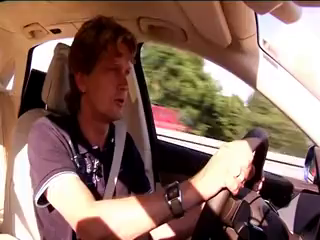

In [ ]:
video_path = "dataset/msrvtt/videos_240_h264_keyint_40/video0.mp4"
cv2_frames = extract_frames_as_pil(video_path)
print(f"Extracted {len(cv2_frames)} frames from {video_path}")
cv2_frames[0]#.show()  # Display the first frame

In [ ]:
for i in range(1, 42):
    all_frames = extract_frames_as_pil(video_path)[:i]
    keyframes = all_frames[::40] # Ensure the last frame is included if it is not a keyframe
    keyframes.append(all_frames[-1])
    assert len(keyframes) == (len(all_frames[::40]) + 1)

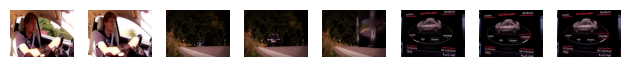

In [ ]:
import matplotlib.pyplot as plt


for i, frame in enumerate(cv2_frames[::40]):
    plt.subplot(1, len(cv2_frames[::40]), i + 1)
    plt.imshow(frame)
    plt.axis('off')
plt.tight_layout()
plt.show()

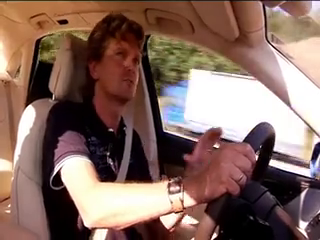

In [ ]:
cv2_frames[-1]

In [ ]:
import av
import os


# Mở file video
container = av.open(video_path)
frame_count = 0

# Lặp qua các frame trong stream video
# Chúng ta decode stream video chính (thường là stream 0)
for frame in container.decode(video=0):
    frame_count += 1

container.close()
print(f"Đã trích xuất {frame_count} frames từ video {video_path}")

Đã trích xuất 300 frames từ video dataset/msrvtt/videos_240_h264_keyint_40/video0.mp4


In [ ]:
import numpy as np
import pandas as pd
import h5py
import av
import torch
from tqdm import tqdm
from pathlib import Path
from torchvision import io

In [ ]:
video_path = "dataset/msrvtt/videos_240_h264_keyint_40/video0.mp4"
video_data, _, info = io.read_video(
    filename=video_path,
    pts_unit='sec',
    output_format="TCHW"
)
assert video_data.ndim == 4  # T, C, H, W
assert video_data.shape[1] == 3  # C=3

In [ ]:
len(video_data)

300

In [ ]:
300 // 40

7

In [ ]:
len(video_data[::40]) + 1

9

In [ ]:
a = list(range(300))
a = a[::40]  # lấy mỗi 40 phần tử
a

[0, 40, 80, 120, 160, 200, 240, 280]

In [ ]:
a = list(range(25))
print(a)
keyint = 10
print(a[0:keyint])
print(a[keyint:(keyint*2)])
print(a[(keyint*2):(keyint*3)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[20, 21, 22, 23, 24]


In [ ]:
a[-(keyint*2):]

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [ ]:
import numpy as np

a = np.random.randn(3, 300, 2, 2)
a = a[:,::40,:,:]
a.shape

(3, 8, 2, 2)

In [ ]:
0 40 80 120 160 200 240 280

In [ ]:
a.shape[1]

8

In [ ]:
a = np.random.randn(3, 300, 2, 2)
a[:,-(20*2):,:,:].shape

(3, 40, 2, 2)

In [ ]:
import cv2
import time

# Start video capture
video = cv2.VideoCapture("dataset/msrvtt/videos_240_h264_keyint_40/video0.mp4")

# Get FPS using OpenCV property
fps = video.get(cv2.CAP_PROP_FPS)
print(f"Frames per second using video.get(cv2.CAP_PROP_FPS): {fps}")

# Calculate FPS manually
num_frames = 120  # Number of frames to capture
print(f"Capturing {num_frames} frames")

# Start time
start = time.time()

# Capture frames
for i in range(num_frames):
    ret, frame = video.read()

# End time
end = time.time()

# Calculate time elapsed and FPS
seconds = end - start
fps_manual = num_frames / seconds
print(f"Time taken: {seconds} seconds")
print(f"Estimated frames per second: {fps_manual}")

# Release the video capture object
video.release()

Frames per second using video.get(cv2.CAP_PROP_FPS): 25.0
Capturing 120 frames
Time taken: 0.06110191345214844 seconds
Estimated frames per second: 1963.9319494303106


In [ ]:
import cv2
cap = cv2.VideoCapture('dataset/msrvtt/videos_240_h264_keyint_40/video0.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration_sec = count / fps if fps > 0 else None
print('reported fps:', fps)
print('reported frame count:', count)
print('implied duration (s):', duration_sec)
cap.release()

reported fps: 25.0
reported frame count: 300
implied duration (s): 12.0


In [ ]:
import cv2
cap = cv2.VideoCapture('dataset/msrvtt/videos_240_h264_keyint_40/video0.mp4')
i = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    ts_ms = cap.get(cv2.CAP_PROP_POS_MSEC)
    print(i, 'timestamp_ms=', ts_ms)
    i += 1
cap.release()
print('total frames read:', i)

0 timestamp_ms= 0.0
1 timestamp_ms= 40.0
2 timestamp_ms= 80.0
3 timestamp_ms= 120.0
4 timestamp_ms= 160.0
5 timestamp_ms= 200.0
6 timestamp_ms= 240.0
7 timestamp_ms= 280.0
8 timestamp_ms= 320.0
9 timestamp_ms= 360.0
10 timestamp_ms= 400.0
11 timestamp_ms= 440.0
12 timestamp_ms= 480.0
13 timestamp_ms= 520.0
14 timestamp_ms= 560.0
15 timestamp_ms= 600.0
16 timestamp_ms= 640.0
17 timestamp_ms= 680.0
18 timestamp_ms= 720.0
19 timestamp_ms= 760.0
20 timestamp_ms= 800.0
21 timestamp_ms= 840.0
22 timestamp_ms= 880.0
23 timestamp_ms= 920.0
24 timestamp_ms= 960.0
25 timestamp_ms= 1000.0
26 timestamp_ms= 1040.0
27 timestamp_ms= 1080.0
28 timestamp_ms= 1120.0
29 timestamp_ms= 1160.0
30 timestamp_ms= 1200.0
31 timestamp_ms= 1240.0
32 timestamp_ms= 1280.0
33 timestamp_ms= 1320.0
34 timestamp_ms= 1360.0
35 timestamp_ms= 1400.0000000000002
36 timestamp_ms= 1440.0
37 timestamp_ms= 1480.0
38 timestamp_ms= 1520.0
39 timestamp_ms= 1560.0
40 timestamp_ms= 1600.0
41 timestamp_ms= 1640.0000000000002
42 time

# Extract information from annotations

In [ ]:
import json
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

json_files = os.listdir('./dataset/vatex')
vatex_files = [f for f in json_files if f.startswith('vatex_')]
vatex_files

['vatex_public_test_english_v1.1.json',
 'vatex_training_v1.0.json',
 'vatex_validation_v1.0.json']

In [ ]:
target_vid = "5mBqtX4KrGk"
for vatex_file in vatex_files:
    with open(f"dataset/vatex/{vatex_file}", "r") as f:
        annotations = json.load(f)

        for annotation in tqdm(annotations):
            video_id = annotation['videoID']
            if video_id.startswith(target_vid):
                print(video_id)
                raise StopIteration

 20%|█▉        | 5147/25991 [00:00<00:00, 2908269.26it/s]

5mBqtX4KrGk_000001_000011


StopIteration: 

In [ ]:
total_videos = 0
captions = {}
video_ids = []
for vatex_file in vatex_files:
    print(f"----- {vatex_file} -----")
    with open(f"dataset/vatex/{vatex_file}", "r") as f:
        annotations = json.load(f)
        print(f"Number of videos: {len(annotations)}")
        total_videos += len(annotations)

        for annotation in tqdm(annotations):
            video_id = annotation['videoID']
            _vid_elements = video_id.split("_")
            end_time = int(_vid_elements[-1])
            start_time = int(_vid_elements[-2])
            assert (end_time - start_time) == 10, f"[{video_id}] Duration is not 10 seconds!"
            
            parts = video_id.rsplit('_', 2)
            vid = parts[0]
            captions[vid] = annotation['enCap']
            video_ids.append(vid)

print(f"Total number of videos in Vatex dataset: {total_videos}")
assert len(video_ids) == total_videos

----- vatex_public_test_english_v1.1.json -----
Number of videos: 6000


100%|██████████| 6000/6000 [00:00<00:00, 529461.28it/s]

----- vatex_training_v1.0.json -----


Number of videos: 25991


100%|██████████| 25991/25991 [00:00<00:00, 740534.99it/s]


----- vatex_validation_v1.0.json -----
Number of videos: 3000


100%|██████████| 3000/3000 [00:00<00:00, 485451.85it/s]

Total number of videos in Vatex dataset: 34991


In [ ]:
captions

{'5-xGskbsBgI': ['A young man is showing the polish, water. old soft cloth and brush needed to polish shoes with.',
  'A person is setting up a table to get get ready to shine boots',
  'A man is giving instructions on how to polish with a brush and polisher.',
  'A  guy is explaining the items you need to clean a pair of shoes.',
  'A young man is preparing to demonstrate how to shine shoes.',
  'A man picks up a can of shoe paste, a towel, and brush from a table.',
  'A man is explaining what you need in order to shine shoes.',
  'A man instructs people on how to properly polish a pair of boots.',
  'A man is showing the products he uses to clean and shine shoes.',
  'A man discusses polishing an old pair of boots with an old t-shirt and a brush.'],
 'uaoC__dKucA': ['A woman explains how to sew a beanie as she sews a beanie in her hands.',
  'A lady is knitting a hat with straight knitting needles and she is explaining the process of what to do.',
  'A person is knitting with the hel

In [ ]:
import json

youtube_video_ids = set()
vid_to_full_video_id = {}
duplicated_video_ids = set()

for vatex_file in vatex_files:
    print(f"----- {vatex_file} -----")
    with open(f"dataset/vatex/{vatex_file}", "r") as f:
        annotations = json.load(f)
        for annotation in annotations:
            full_video_id = annotation['videoID']
            parts = full_video_id.rsplit('_', 2)
            vid = parts[0]

            if vid not in youtube_video_ids:
                youtube_video_ids.add(vid)
                vid_to_full_video_id[vid] = full_video_id
            else:
                duplicated_video_ids.add(vid)
                print(
                    f"[DUPLICATE] {vid} already exists in youtube_video_ids => {vid_to_full_video_id[vid]} VS {full_video_id}")

print(
    f"Total unique YouTube video IDs in Vatex dataset: {len(youtube_video_ids)}")

----- vatex_public_test_english_v1.1.json -----
----- vatex_training_v1.0.json -----
[DUPLICATE] xnC3nngvLCo already exists in youtube_video_ids => xnC3nngvLCo_000007_000017 VS xnC3nngvLCo_000083_000093
[DUPLICATE] SN5awGHfw9M already exists in youtube_video_ids => SN5awGHfw9M_000036_000046 VS SN5awGHfw9M_000027_000037
[DUPLICATE] CYGlFBgKZV0 already exists in youtube_video_ids => CYGlFBgKZV0_000102_000112 VS CYGlFBgKZV0_000145_000155
[DUPLICATE] dMzycn1d3qU already exists in youtube_video_ids => dMzycn1d3qU_000001_000011 VS dMzycn1d3qU_000000_000010
----- vatex_validation_v1.0.json -----
[DUPLICATE] Z03StBdQzog already exists in youtube_video_ids => Z03StBdQzog_000055_000065 VS Z03StBdQzog_000017_000027
Total unique YouTube video IDs in Vatex dataset: 34986


In [ ]:
# Save to txt
with open("duplicated_video_ids.txt", "w") as f:
    f.write("\n".join(duplicated_video_ids))

In [ ]:
import json

vatex_vid_to_youtube_vid = {}

for vatex_file in vatex_files:
    print(f"----- {vatex_file} -----")
    with open(f"dataset/vatex/{vatex_file}", "r") as f:
        annotations = json.load(f)
        for annotation in annotations:
            vatex_vid = annotation['videoID']
            parts = vatex_vid.rsplit('_', 2)
            youtube_vid = parts[0]
            vatex_vid_to_youtube_vid[vatex_vid] = youtube_vid

print(f"Total unique Vatex video IDs: {len(vatex_vid_to_youtube_vid)}")

----- vatex_public_test_english_v1.1.json -----
----- vatex_training_v1.0.json -----
----- vatex_validation_v1.0.json -----
Total unique Vatex video IDs: 34991


In [ ]:
with open("vatex_vid_to_youtube_vid.json", "w") as f:
    json.dump(vatex_vid_to_youtube_vid, f, indent=4)

In [ ]:
import h5py

with h5py.File("./temp_feats.hdf5", "a") as hf:
    if "feat_1" not in hf:
        hf.create_dataset("feat_1", data=1111)
    else:
        print("Exist feat_1")
with h5py.File("./temp_feats.hdf5", "a") as hf:
    if "feat_2" not in hf:
        hf.create_dataset("feat_2", data=2222)
    else:
        print("Exist feat_2")

with h5py.File("./temp_feats.hdf5", "a") as hf:
    if "feat_3" not in hf:
        hf.create_dataset("feat_3", data=3333)
    else:
        print("Exist feat_3")

with h5py.File("./temp_feats.hdf5", "r") as hf:
    for feat_type in hf.keys():
        print(f"{feat_type} => {hf[feat_type][()]}")

Exist feat_1
Exist feat_2
Exist feat_3
feat_1 => 1111
feat_2 => 2222
feat_3 => 3333


# Train-Val-Test split vatexVID


In [4]:
"""
vatex_train_english_v1.0_privacy_limited.json
vatex_val_english_v1.0_privacy_limited.json
vatex_public_test_english_v1.1_privacy_limited.json
""";

In [5]:
# Load valid train-val-test vatexVID
with open("./current_vatex_ids.txt", "r") as f:
    valid_video_ids = set(line.replace(".mp4","") for line in f.read().splitlines())
print(f"Total valid video IDs: {len(valid_video_ids)}")

Total valid video IDs: 34793


In [6]:
import json

with open("./dataset/vatex/vatex_training_v1.0.json", "r") as f:
    org_annotations = json.load(f)

limited_annotations = []
i = 0
for item in org_annotations:
    vatex_vid = item['videoID']
    if vatex_vid in valid_video_ids:
        assert type(item["enCap"]) == list
        assert len(item["enCap"]) == 10
        limited_annotations.append({
            "videoID": item["videoID"],
            "enCap": item["enCap"]
        })
    else:
        i += 1
        print(f"[{i}] Missing video: {vatex_vid}")
print(f"Total limited annotations: {len(limited_annotations)}")

with open("./vatex_train_english_v1.0_privacy_limited.json", "w") as f:
    json.dump(limited_annotations, f, indent=4)

[1] Missing video: YuD-mBqqhwM_000638_000648
[2] Missing video: P6Oi9mx6fDg_000000_000010
[3] Missing video: 9siaiHu5Dlw_000011_000021
[4] Missing video: lf1uCA1LuIE_000159_000169
[5] Missing video: 90gwURx1Qsg_000023_000033
[6] Missing video: zTk60YKpMbY_000000_000010
Total limited annotations: 25985


In [7]:
25985 / 25991

0.999769150859913

In [8]:
import json

with open("dataset/vatex/vatex_validation_v1.0.json", "r") as f:
    org_annotations = json.load(f)

limited_annotations = []
i = 0
for item in org_annotations:
    vatex_vid = item['videoID']
    if vatex_vid in valid_video_ids:
        assert type(item["enCap"]) == list
        assert len(item["enCap"]) == 10
        limited_annotations.append({
            "videoID": item["videoID"],
            "enCap": item["enCap"]
        })
    else:
        i += 1
        print(f"[{i}] Missing video: {vatex_vid}")
print(f"Total limited annotations: {len(limited_annotations)}")

with open("./vatex_val_english_v1.0_privacy_limited.json", "w") as f:
    json.dump(limited_annotations, f, indent=4)

Total limited annotations: 3000


In [9]:
3000 / 3000

1.0

In [10]:
import json

with open("dataset/vatex/vatex_public_test_english_v1.1.json", "r") as f:
    org_annotations = json.load(f)

limited_annotations = []
i = 0
for item in org_annotations:
    vatex_vid = item['videoID']
    if vatex_vid in valid_video_ids:
        assert type(item["enCap"]) == list
        assert len(item["enCap"]) == 10
        limited_annotations.append({
            "videoID": item["videoID"],
            "enCap": item["enCap"]
        })
    else:
        i += 1
        print(f"[{i}] Missing video: {vatex_vid}")
print(f"Total limited annotations: {len(limited_annotations)}")

with open("./vatex_public_test_english_v1.1_privacy_limited.json", "w") as f:
    json.dump(limited_annotations, f, indent=4)

[1] Missing video: q83q9Z1DtQ0_000237_000247
[2] Missing video: IDr9NHPNlW8_000101_000111
[3] Missing video: zwxqIKwviHg_000004_000014
[4] Missing video: 75XDx5RGusk_000012_000022
[5] Missing video: JUD699Q3hU0_000052_000062
[6] Missing video: AnwCVPInx18_000064_000074
[7] Missing video: DGSfcAICwx0_000000_000010
[8] Missing video: 3XNJ0WjFL88_000125_000135
[9] Missing video: kPPJWRQFpuA_000051_000061
[10] Missing video: fOd5Ynz_ang_000209_000219
[11] Missing video: a-SfHsg-0jE_000106_000116
[12] Missing video: vLVriglUlpc_000193_000203
[13] Missing video: ypsPcmnMIg8_000278_000288
[14] Missing video: l2qCiw1LrQw_000025_000035
[15] Missing video: QKrntLAipCU_000038_000048
[16] Missing video: 3vaSJkHGnKE_000006_000016
[17] Missing video: EXeiSVI3VCU_000122_000132
[18] Missing video: V4kD7hSL5LI_000000_000010
[19] Missing video: alVI2nbx30w_000096_000106
[20] Missing video: xKsBS-j9zeo_000112_000122
[21] Missing video: rXK_Vb-nNog_000024_000034
[22] Missing video: mCmQdBwxSF4_000000_0000

In [12]:
5808 / 6000

0.968

In [13]:
# Sanity check
with open("./current_vatex_ids.txt", "r") as f:
    preprocessed_video_ids = set(f.read().splitlines())
print(f"Total preprocessed video IDs: {len(preprocessed_video_ids)}")

json_files_vids = set()
with open("./vatex_train_english_v1.0_privacy_limited.json", "r") as f:
    annotations = json.load(f)
    print(f">> Total annotations in train JSON file: {len(annotations)}")
    for item in annotations:
        vid = item['videoID']
        json_files_vids.add(vid)
with open("./vatex_val_english_v1.0_privacy_limited.json", "r") as f:
    annotations = json.load(f)
    print(f">> Total annotations in val JSON file: {len(annotations)}")
    for item in annotations:
        vid = item['videoID']
        json_files_vids.add(vid)
with open("./vatex_public_test_english_v1.1_privacy_limited.json", "r") as f:
    annotations = json.load(f)
    print(f">> Total annotations in test JSON file: {len(annotations)}")
    for item in annotations:
        vid = item['videoID']
        json_files_vids.add(vid)
print(f"Total video IDs in JSON files: {len(json_files_vids)}")

missing_vids = preprocessed_video_ids - json_files_vids
print(f"Total missing video IDs: {len(missing_vids)}")

Total preprocessed video IDs: 34793
>> Total annotations in train JSON file: 25985
>> Total annotations in val JSON file: 3000
>> Total annotations in test JSON file: 5808
Total video IDs in JSON files: 34793
Total missing video IDs: 34793


# Tạo file CSV chứa thông tin về các video trong tập train, val, test của VATEX dataset

In [19]:
import json
import os
import pandas as pd
from tqdm import tqdm

full_annotations = []

data_dir: str = "/mnt/d/__CoCap/dataset/vatex"
for file_name in os.listdir(data_dir):
    if file_name.startswith("vatex_"):
        print(f"Found annotation file: {file_name}")
        file_path: str = os.path.join(data_dir, file_name)
        with open(file_path, "r") as f:
            data: list = json.load(f)

            for item in tqdm(data):
                vatex_vid: str = item['videoID']
                _parts: list[str] = vatex_vid.rsplit("_", 2)

                youtube_id: str = _parts[0]
                time_start: int = int(_parts[-2])
                time_end  : int = int(_parts[-1])

                full_annotations.append([youtube_id, time_start, time_end, vatex_vid])

print(f"\nlen(full_annotations)={len(full_annotations)}")

Found annotation file: vatex_public_test_english_v1.1.json


100%|██████████| 6000/6000 [00:00<00:00, 483418.96it/s]

Found annotation file: vatex_training_v1.0.json



100%|██████████| 25991/25991 [00:00<00:00, 414866.88it/s]


Found annotation file: vatex_validation_v1.0.json


100%|██████████| 3000/3000 [00:00<00:00, 260818.17it/s]


len(full_annotations)=34991


In [20]:
vatex_annotation_df = pd.DataFrame(
    data=full_annotations,
    columns=["youtube_id", "time_start", "time_end", "vatex_vid"])
assert (vatex_annotation_df["time_end"] - vatex_annotation_df["time_start"]).unique() == 10
vatex_annotation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34991 entries, 0 to 34990
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   youtube_id  34991 non-null  object
 1   time_start  34991 non-null  int64 
 2   time_end    34991 non-null  int64 
 3   vatex_vid   34991 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [21]:
vatex_annotation_df.to_csv("./my_vatex_annotations.csv", index=False)
del vatex_annotation_df

In [3]:
vatex_annotation_df = pd.read_csv("./my_vatex_annotations.csv")
vatex_annotation_df.head()

,youtube_id,time_start,time_end,vatex_vid
0,5-xGskbsBgI,55,65,5-xGskbsBgI_000055_000065
1,uaoC__dKucA,518,528,uaoC__dKucA_000518_000528
2,mCqb6dJBDC8,80,90,mCqb6dJBDC8_000080_000090
3,m2_qmRnjICE,17,27,m2_qmRnjICE_000017_000027
4,hIj7fi9QgmA,9,19,hIj7fi9QgmA_000009_000019


In [23]:
# kinetics_val_annotations = []
# with open("./kinetics600_val_set.txt") as f:
#     for line in f.readlines():
#         line = line.strip()
#         if line.endswith(".mp4"):
#             line  : str = line.replace(".mp4", "")
#             _parts: list[str] = line.rsplit("_", 2)
            
#             youtube_id: str = _parts[0]
#             time_start: int = int(_parts[-2])
#             time_end  : int = int(_parts[-1])

#             kinetics_val_annotations.append([youtube_id, time_start, time_end])

# print(f"len(kinetics_val_annotations)={len(kinetics_val_annotations)}")

In [24]:
# kinetics_val_df = pd.DataFrame(
#     data=kinetics_val_annotations,
#     columns=["youtube_id", "time_start", "time_end"])
# assert (kinetics_val_df["time_end"] - kinetics_val_df["time_start"]).unique() == 10
# kinetics_val_df.info()

In [4]:
kinetics_val_df = pd.read_csv("./kinetics600_val_set.csv")
kinetics_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28318 entries, 0 to 28317
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       28318 non-null  object
 1   youtube_id  28318 non-null  object
 2   time_start  28318 non-null  int64 
 3   time_end    28318 non-null  int64 
 4   split       28318 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [5]:
kinetics_holdout_test_df = pd.read_csv("./kinetics600_holdout_test.csv")
kinetics_holdout_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12840 entries, 0 to 12839
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   youtube_id  12840 non-null  object
 1   time_start  12840 non-null  int64 
 2   time_end    12840 non-null  int64 
 3   split       12840 non-null  object
dtypes: int64(2), object(2)
memory usage: 401.4+ KB


In [6]:
kinetics_df = pd.concat([kinetics_val_df, kinetics_holdout_test_df])
assert len(kinetics_df) == len(kinetics_val_df) + len(kinetics_holdout_test_df)
# kinetics_df.reset_index(inplace=True)
kinetics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41158 entries, 0 to 12839
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       28318 non-null  object
 1   youtube_id  41158 non-null  object
 2   time_start  41158 non-null  int64 
 3   time_end    41158 non-null  int64 
 4   split       41158 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
kinetics_vatex_vids = set()
vatex_vids = []
for item in kinetics_df.iterrows():
    _ser = item[1]
    youtube_id = _ser['youtube_id']
    time_start = int(_ser['time_start'])
    time_end   = int(_ser['time_end'])
    
    vatex_vid = f"{youtube_id}_{time_start:06}_{time_end:06}"
    kinetics_vatex_vids.add(vatex_vid)
    vatex_vids.append(vatex_vid)

kinetics_df["vatex_vid"] = vatex_vids
print(f"len(kinetics_vatex_vids)={len(kinetics_vatex_vids)}")

len(kinetics_vatex_vids)=41158


In [8]:
vatex_vids = set(vatex_annotation_df['vatex_vid'])
print(f"len(vatex_vids)={len(vatex_vids)}")

len(vatex_vids)=34991


In [9]:
vatex_vids.issubset(kinetics_vatex_vids)

False

In [10]:
missing_vids = vatex_vids - kinetics_vatex_vids
print(len(missing_vids))

949


In [11]:
vatex_annotation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34991 entries, 0 to 34990
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   youtube_id  34991 non-null  object
 1   time_start  34991 non-null  int64 
 2   time_end    34991 non-null  int64 
 3   vatex_vid   34991 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [12]:
kinetics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41158 entries, 0 to 12839
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       28318 non-null  object
 1   youtube_id  41158 non-null  object
 2   time_start  41158 non-null  int64 
 3   time_end    41158 non-null  int64 
 4   split       41158 non-null  object
 5   vatex_vid   41158 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.2+ MB


In [13]:
with open("./train_val_test_preprocessed_video_ids.txt", "r") as f:
    preprocessed_video_ids = set(f.read().splitlines())
print(f"Total preprocessed video IDs: {len(preprocessed_video_ids)}")

Total preprocessed video IDs: 29910


In [14]:
target_vids = vatex_vids - preprocessed_video_ids
len(target_vids)

5081

In [15]:
target_df = \
kinetics_df[(kinetics_df['vatex_vid'].isin(target_vids))
            & (kinetics_df['split'] == 'validate')]

In [16]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3383 entries, 16 to 28307
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       3383 non-null   object
 1   youtube_id  3383 non-null   object
 2   time_start  3383 non-null   int64 
 3   time_end    3383 non-null   int64 
 4   split       3383 non-null   object
 5   vatex_vid   3383 non-null   object
dtypes: int64(2), object(4)
memory usage: 185.0+ KB


In [56]:
target_df['label'].unique()

array(['giving or receiving award', 'air drumming',
       'bouncing on trampoline', 'belly dancing', 'using segway',
       'cooking sausages (not on barbeque)', 'smoking',
       'poking bellybutton', 'scrambling eggs', 'walking the dog',
       'playing bagpipes', 'eating doughnuts', 'juggling fire',
       'laying stone', 'washing hair', 'snorkeling', 'doing nails',
       'reading book', 'parasailing', 'playing cello', 'making bubbles',
       'dancing macarena', 'bottling', 'hand washing clothes',
       'smoking pipe', 'breaking boards', 'bungee jumping',
       'sweeping floor', 'playing guitar', 'putting on eyeliner',
       'eating burger', 'playing keyboard', 'playing chess',
       'washing hands', 'tie dying', 'tickling', 'crying',
       'catching or throwing baseball', 'climbing tree', 'mopping floor',
       'front raises', 'doing jigsaw puzzle', 'kissing',
       'throwing snowballs', 'bandaging', 'playing cricket',
       'pirouetting', 'exercising with an exercise ba

In [2]:
import pandas as pd

df = pd.read_csv("./kinetics600_val_set.csv")
df[df['label'] == 'abseiling'].to_csv("./abseiling_val_set.csv", index=False)

In [18]:
import pandas as pd

df = pd.read_csv("./my_vatex_annotations.csv")
# youtube_id_ser = 
# youtube_id_ser.duplicated()
df[df['youtube_id'].duplicated()]

,youtube_id,time_start,time_end,vatex_vid
11035,xnC3nngvLCo,83,93,xnC3nngvLCo_000083_000093
19409,SN5awGHfw9M,27,37,SN5awGHfw9M_000027_000037
28799,CYGlFBgKZV0,145,155,CYGlFBgKZV0_000145_000155
31837,dMzycn1d3qU,0,10,dMzycn1d3qU_000000_000010
34154,Z03StBdQzog,17,27,Z03StBdQzog_000017_000027


In [ ]:
```
----- vatex_public_test_english_v1.1.json -----
----- vatex_training_v1.0.json -----
[DUPLICATE] xnC3nngvLCo already exists in youtube_video_ids => xnC3nngvLCo_000007_000017 VS xnC3nngvLCo_000083_000093
[DUPLICATE] SN5awGHfw9M already exists in youtube_video_ids => SN5awGHfw9M_000036_000046 VS SN5awGHfw9M_000027_000037
[DUPLICATE] CYGlFBgKZV0 already exists in youtube_video_ids => CYGlFBgKZV0_000102_000112 VS CYGlFBgKZV0_000145_000155
[DUPLICATE] dMzycn1d3qU already exists in youtube_video_ids => dMzycn1d3qU_000001_000011 VS dMzycn1d3qU_000000_000010
----- vatex_validation_v1.0.json -----
[DUPLICATE] Z03StBdQzog already exists in youtube_video_ids => Z03StBdQzog_000055_000065 VS Z03StBdQzog_000017_000027
Total unique YouTube video IDs in Vatex dataset: 34986
```